<a href="https://colab.research.google.com/github/vanditanandal/EDA/blob/main/MNIST_Digit_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MINST Handwritten digit classification using deep learning (neural network)

In [1]:
#importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #for image recognisition tasks (computer vision(cv))
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### loading the mnist data from keras.datasets

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Training data = 60k images
### Test data = 10k images
### image dimension 28 x 28
### grayscale image = 1 channel

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
X_train[10].shape

(28, 28)

2


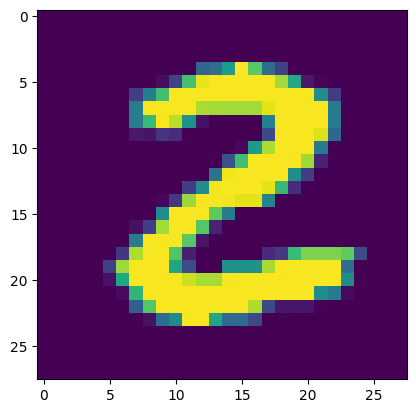

In [7]:
plt.imshow(X_train[25])
plt.show
print(Y_train[25])

### Image labels

In [8]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### we can use these labels as such or we can also apply one hot encoding
### all the images have same dimensions if not we have to resize the image to common dimensions

In [9]:
#scaling the values

X_train=X_train/255
X_test=X_test/255

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [11]:
#setting up the layes of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(50,activation='relu'), #hidden layer
    keras.layers.Dense(50,activation='relu'), #output layer
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#training the neural network

model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8491 - loss: 0.5043
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9556 - loss: 0.1481
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9680 - loss: 0.1078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9827 - loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0483
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9893 - loss: 0.0359
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0328


### Training data accuracy=98.9%

In [14]:
loss,accuracy=model.evaluate(X_test,Y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9661 - loss: 0.1328


0.9696999788284302

### Test data accuracy=97.1%

In [15]:
print(X_test.shape)

(10000, 28, 28)


5


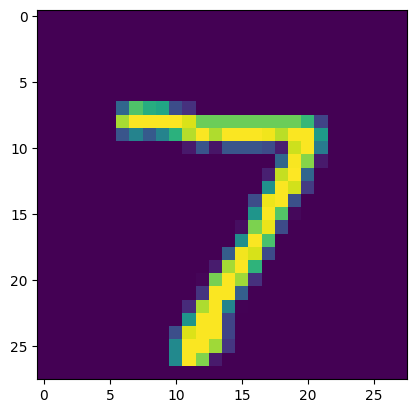

In [16]:
plt.imshow(X_test[0])
print(Y_train[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[5.6176221e-01 7.3632267e-03 4.3938404e-01 9.5680887e-01 1.3921116e-05
 2.6069474e-03 4.2440818e-13 9.9999917e-01 2.4163588e-04 6.7606783e-01]


### model.predict() gives the prediction probability of each class for a particular data point

In [22]:
#converting the prediction probabilities to calss label

label_for_first_image = np.argmax(Y_pred[0])
label_for_first_image

7

In [23]:
#converting the prediction probabilities to calss label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
print(Y_pred)

[[5.6176221e-01 7.3632267e-03 4.3938404e-01 ... 9.9999917e-01
  2.4163588e-04 6.7606783e-01]
 [4.5586050e-02 2.0803559e-01 9.9999988e-01 ... 2.3762047e-06
  6.3756919e-03 1.0075390e-08]
 [4.4997232e-05 9.9972034e-01 2.4004227e-01 ... 2.0220283e-01
  8.6314920e-03 1.6202709e-04]
 ...
 [1.2667658e-08 5.2077630e-06 9.7425963e-04 ... 7.3701829e-01
  4.6952450e-01 7.0232493e-01]
 [3.5265251e-07 8.2875398e-05 4.7082911e-09 ... 3.6635235e-08
  9.4589895e-01 6.6605920e-05]
 [6.2019704e-04 2.3113198e-06 1.5019600e-03 ... 3.7071448e-09
  5.9596701e-03 4.7043487e-04]]




Y_test --> True labels

Y_pred_labels --> Predicted Labels


### CONFUSION MATRIX

In [25]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [27]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    2,    3,    3,    1,    4,    0,    1,   15],
       [   1, 1113,    0,    7,    2,    1,    6,    0,    5,    0],
       [   2,    2,  994,   15,    4,    0,    4,    6,    4,    1],
       [   0,    0,    4,  987,    3,    5,    1,    4,    3,    3],
       [   0,    0,    1,    0,  966,    2,    5,    2,    1,    5],
       [   3,    0,    0,   19,    1,  859,    3,    1,    4,    2],
       [   9,    2,    1,    1,   10,    8,  924,    0,    3,    0],
       [   0,    2,    9,    3,    6,    0,    0,  993,    5,   10],
       [   2,    0,    3,   11,    7,    6,    2,    3,  938,    2],
       [   1,    2,    0,    4,   27,    3,    1,    4,    3,  964]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

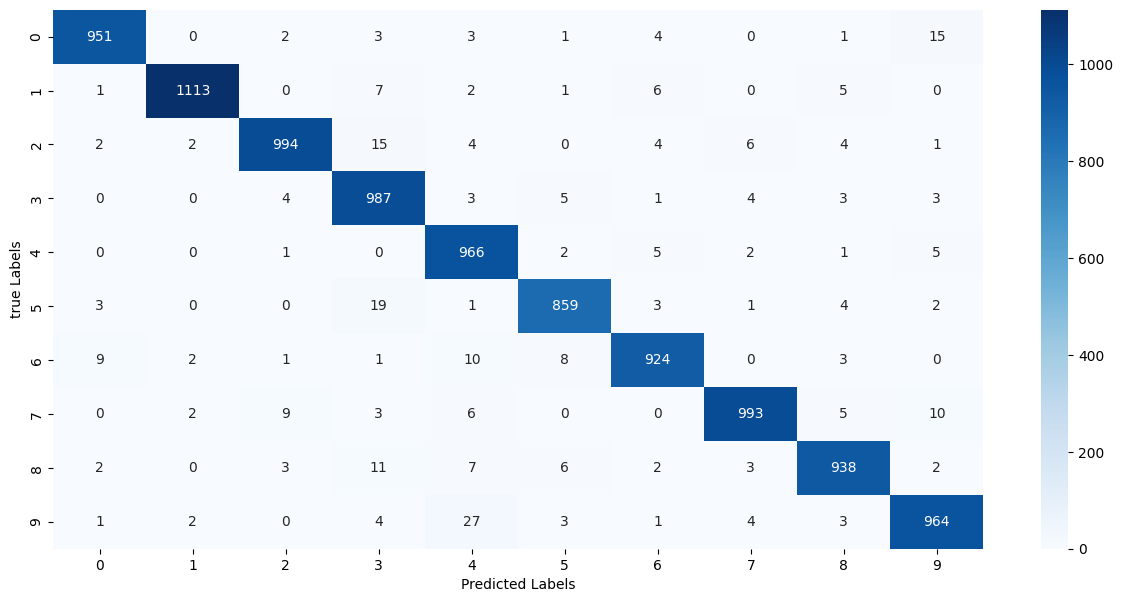

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, fmt = 'd', cmap = 'Blues')
plt.ylabel('true Labels')
plt.xlabel('Predicted Labels')

### Building a prediction system

In [57]:
input_image_path = '/content/six_minist.jpg'
input_image = cv2.imread(input_image_path)

In [40]:
type(input_image)

numpy.ndarray

In [41]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


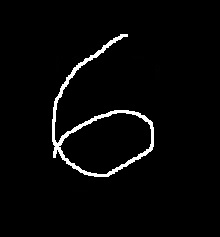

In [42]:
cv2_imshow(input_image)

In [43]:
input_image.shape

(237, 220, 3)

In [44]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [45]:
grayscale.shape

(237, 220)

In [46]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [47]:
input_image_resize.shape

(28, 28)

In [48]:
cv2_imshow(input_image_resize)

In [49]:
input_image_resize = input_image_resize/255

In [50]:
type(input_image_resize)

numpy.ndarray

In [51]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [53]:
input_prediction = model.predict(image_reshaped)
input_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.06845979, 0.05487323, 0.5720075 , 0.10043552, 0.57484984,
        0.61194813, 0.60280263, 0.15970114, 0.5563719 , 0.08603448]],
      dtype=float32)

In [54]:
input_pred_label = np.argmax(input_prediction)

In [55]:
print(input_pred_label)

5


### Predictive System

Path of the image to be predicted: /content/four_mnist.jpg


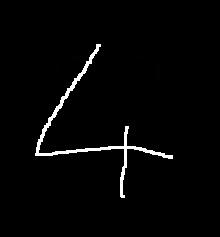

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Handwritten Digit is recognised as  4


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)